In [29]:
import numpy as np
import math
from math import cos, sin, pi
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

In [30]:
"""
returns the 4 outer tangential points of 2 circles (x1, y1) and (x2, y2) with radii r1 and r2
reference: https://en.wikipedia.org/wiki/Tangent_lines_to_circles
"""
def big_wind_plt_1(x1, y1, x2, y2, r1, r2):
    r1 /= 60
    r2 /= 60
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    if dist == 0 :
        return [0,0,0,0], [0,0,0,0]
    
    gamma = -np.arctan((y2-y1)/(x2-x1))
    beta = np.arcsin((r2-r1)/dist)
    alpha = gamma - beta

    # points (x3, y3) and (x4, y4)
    x3 = x1 + (r1 * cos( pi / 2 - alpha))
    y3 =  y1 + (r1 * sin( pi / 2 - alpha))
    x4 =  x2 + (r2 * cos( pi / 2 - alpha))
    y4 =  y2 + (r2 * sin( pi / 2 - alpha))

    # points (x5, y5) and (x6, y6)
    x5 = x1 - (r1 * cos( pi / 2 - alpha))
    y5 =  y1 - (r1 * sin( pi / 2 - alpha))
    x6 =  x2 - (r2 * cos( pi / 2 - alpha))
    y6 =  y2 - (r2 * sin( pi / 2 - alpha))

    return [[x3, y3], [x4, y4], [x5, y5], [ x6, y6]]

In [35]:
# get the 4 outer tangential points
points = np.array(big_wind_plt_1(-101.2, 13.7, -112.5, 16.4, 180, 175))
print(points)

[[-100.48190026   16.6127878 ]
 [-111.80184748   19.23187703]
 [-101.91809974   10.7872122 ]
 [-113.19815252   13.56812297]]


In [36]:
# generate the convex hull polygon of the 4 outer tangential points
hull = ConvexHull(points)

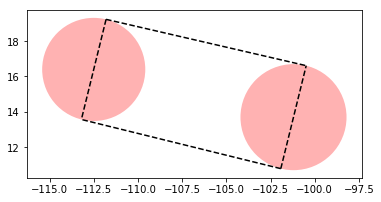

In [38]:
# plot everything together
plt.axes()

# plot the circles
plt.gca().add_patch( plt.Circle((-101.2, 13.7), 180/60, fc='r',  alpha=0.3))
plt.gca().add_patch( plt.Circle((-112.5, 16.4), 175/60, fc='r',  alpha=0.3))


# plt.gca().add_patch(plt.Polygon(np.array([[-113.19815252467117, 13.568122972878284],
#  [-111.80184747532883, 19.231877027121712],
#  [-101.91809973966177, 10.787212200674807],
#  [-100.48190026033824, 16.61278779932519]]), alpha=0.3))

# plot the convex hull polygon
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k--')

plt.axis('scaled')
plt.show()